In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sqlite3

In [2]:
os.chdir(r'../Data')

In [3]:
conn=sqlite3.connect('./database.sqlite')

In [4]:
print(pd.read_sql_query('select * from artists',conn).head())
# print(pd.read_sql_query('select * from artists',conn).columns.values)
print(pd.read_sql_query('select * from artists',conn).columns)

   reviewid          artist
0     22703  massive attack
1     22721        krallice
2     22659    uranium club
3     22661         kleenex
4     22661         liliput
Index(['reviewid', 'artist'], dtype='object')


In [5]:
print(pd.read_sql_query('select * from content',conn).head())

   reviewid                                            content
0     22703  “Trip-hop” eventually became a ’90s punchline,...
1     22721  Eight years, five albums, and two EPs in, the ...
2     22659  Minneapolis’ Uranium Club seem to revel in bei...
3     22661  Kleenex began with a crash. It transpired one ...
4     22725  It is impossible to consider a given release b...


In [6]:
pd.read_sql_query('select * from genres',conn).head()

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


In [7]:
pd.read_sql_query('select * from labels',conn).head()

,reviewid,label
0,22703,virgin
1,22721,hathenter
2,22659,static shock
3,22659,fashionable idiots
4,22661,kill rock stars


In [8]:
reviews=pd.read_sql_query('select * from reviews',conn)
reviews.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18393 non-null  int64  
 1   title           18393 non-null  object 
 2   artist          18393 non-null  object 
 3   url             18393 non-null  object 
 4   score           18393 non-null  float64
 5   best_new_music  18393 non-null  int64  
 6   author          18393 non-null  object 
 7   author_type     14487 non-null  object 
 8   pub_date        18393 non-null  object 
 9   pub_weekday     18393 non-null  int64  
 10  pub_day         18393 non-null  int64  
 11  pub_month       18393 non-null  int64  
 12  pub_year        18393 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


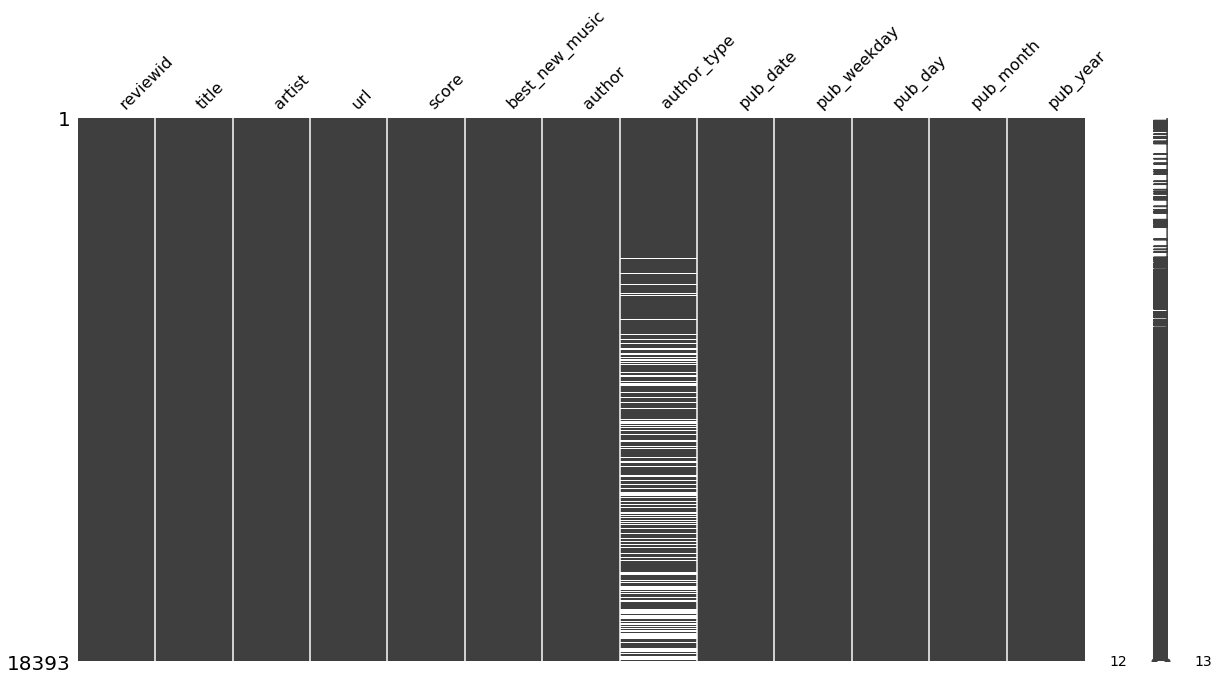

In [10]:
import missingno
missingno.matrix(reviews,figsize=(20,10))

In [11]:
reviews['best_new_music'].value_counts()

0    17450
1      943
Name: best_new_music, dtype: int64

In [12]:
pd.read_sql_query('select * from years',conn).head()

,reviewid,year
0,22703,1998.0
1,22721,2016.0
2,22659,2016.0
3,22661,2016.0
4,22725,2016.0


In [13]:
df=pd.read_sql_query("select r.*,g.genre,l.label from reviews r left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid",conn)
df.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,genre,label
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,electronic,virgin
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,metal,hathenter
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,rock,fashionable idiots
3,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,rock,static shock
4,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,rock,kill rock stars


In [14]:
conn.close()

In [15]:
#df=pd.read_sql_query("select r.reviewid,r.title,r.artist,r.url,r.score,r.best_new_music,r.author,r.author_type,r.pub_date,r.pub_weekday,r.pub_day,r.pub_month,r.pub_year,y.year from reviews r left join years y on r.reviewid=y.reviewid left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid left join content c on r.reviewid=c.reviewid",conn)
#df.head()

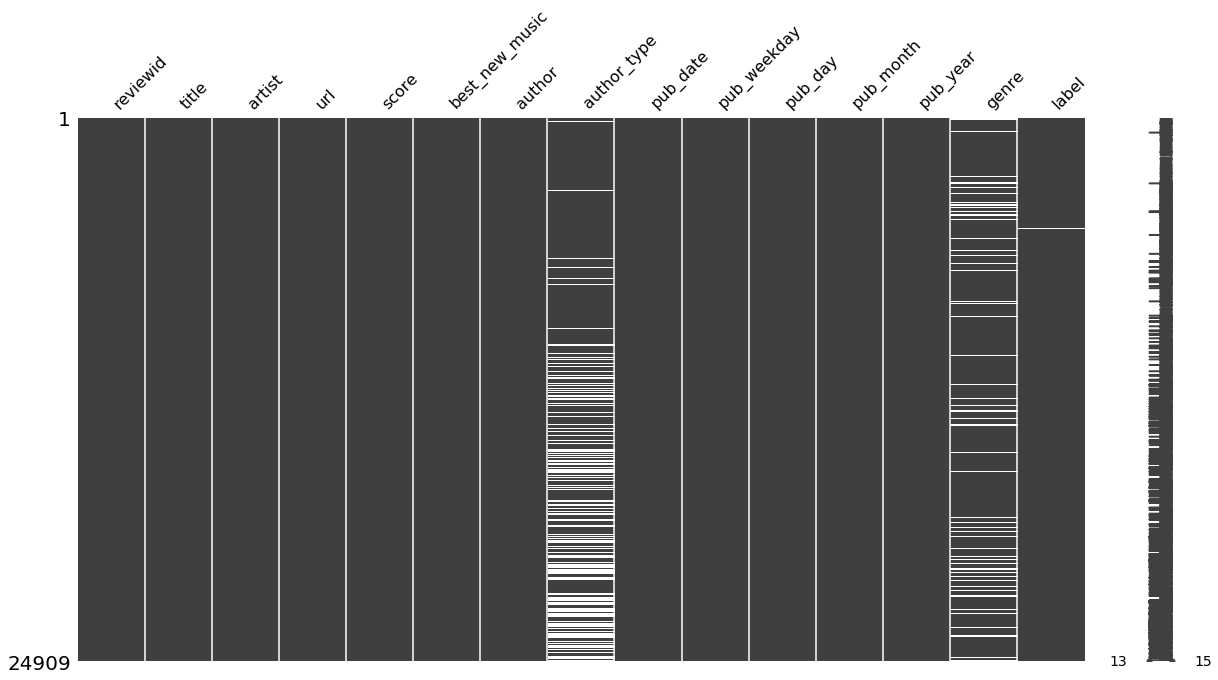

In [16]:
import missingno
missingno.matrix(df,figsize=(20,10))

In [17]:
df.isnull().sum()

reviewid             0
title                0
artist               0
url                  0
score                0
best_new_music       0
author               0
author_type       5422
pub_date             0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
genre             2553
label               40
dtype: int64

In [18]:
df=df.drop(['reviewid','title','url','pub_date'],axis=1)

In [19]:
df.head()

,artist,score,best_new_music,author,author_type,pub_weekday,pub_day,pub_month,pub_year,genre,label
0,massive attack,9.3,0,nate patrin,contributor,6,8,1,2017,electronic,virgin
1,krallice,7.9,0,zoe camp,contributor,5,7,1,2017,metal,hathenter
2,uranium club,7.3,0,david glickman,contributor,5,7,1,2017,rock,fashionable idiots
3,uranium club,7.3,0,david glickman,contributor,5,7,1,2017,rock,static shock
4,"kleenex, liliput",9.0,1,jenn pelly,associate reviews editor,4,6,1,2017,rock,kill rock stars


# Features

## Artists

In [20]:
df['artist'].value_counts()

various artists         769
xiu xiu                  40
deerhoof                 34
animal collective        34
saint etienne            31
                       ... 
quarterbacks              1
felicita                  1
ariel kalma               1
capitol city dusters      1
eleven tigers             1
Name: artist, Length: 8715, dtype: int64

## Score

In [21]:
df['score']

0        9.3
1        7.9
2        7.3
3        7.3
4        9.0
        ... 
24904    6.3
24905    7.2
24906    7.2
24907    7.2
24908    6.5
Name: score, Length: 24909, dtype: float64

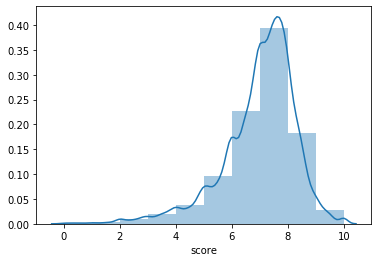

In [22]:
sns.distplot(df['score'],bins=10)

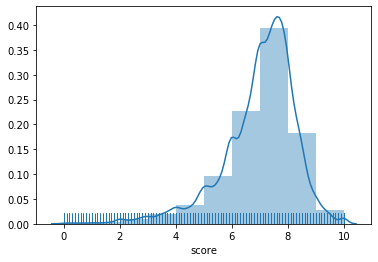

In [23]:
sns.distplot(a=df.score,bins=10,hist=True,kde=True,rug=True);


In [24]:
df['score'].value_counts(bins=10,ascending=True)

(-0.011, 1.0]      47
(1.0, 2.0]        105
(2.0, 3.0]        259
(9.0, 10.0]       512
(3.0, 4.0]        560
(4.0, 5.0]       1116
(5.0, 6.0]       2743
(8.0, 9.0]       3613
(6.0, 7.0]       6251
(7.0, 8.0]       9703
Name: score, dtype: int64

## Best New Music

In [25]:
df['best_new_music'].value_counts()

0    23559
1     1350
Name: best_new_music, dtype: int64

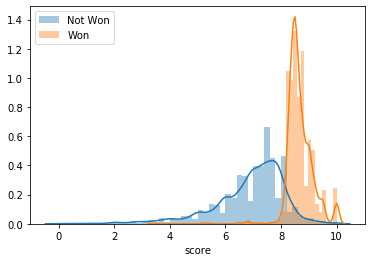

In [26]:
sns.distplot(df[df['best_new_music']==0]['score'])
sns.distplot(df[df['best_new_music']==1]['score'])
plt.legend(labels=['Not Won','Won'])
plt.show()

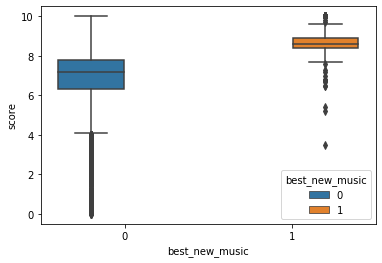

In [27]:
plt.figure()
sns.boxplot(y='score',x='best_new_music',hue='best_new_music',data=df)

In [28]:
df[(df['score']<4)&(df['best_new_music']==1)]

,artist,score,best_new_music,author,author_type,pub_weekday,pub_day,pub_month,pub_year,genre,label
9418,weezer,3.5,1,ian cohen,contributor,2,3,11,2010,rock,geffen


In [29]:
df=df.drop([9418],axis=0)

## Author

In [30]:
df['author'].value_counts(dropna=False)

joe tangari           1079
ian cohen              960
stephen m. deusner     849
brian howe             688
mark richardson        657
                      ... 
alex lindhart            1
minna zhou               1
zach vowell              1
philip sherburne         1
drew gaerig              1
Name: author, Length: 432, dtype: int64

In [31]:
df[df['score']>7]['author'].value_counts()

joe tangari            781
mark richardson        468
stephen m. deusner     466
brian howe             403
marc masters           344
                      ... 
sean t. collins          1
matthew ismael ruiz      1
sara sherr               1
alexander iadarola       1
matt wellins             1
Name: author, Length: 388, dtype: int64

## Author Type

In [32]:
df['author_type'].value_counts(dropna=False)

contributor                  16709
NaN                           5422
senior editor                  669
executive editor               655
senior staff writer            625
contributing editor            237
editor-in-chief                133
deputy news editor             129
associate staff writer         120
associate reviews editor        56
tracks coordinator              55
associate editor                54
assistant editor                19
associate features editor       17
news director                    5
managing editor                  3
Name: author_type, dtype: int64

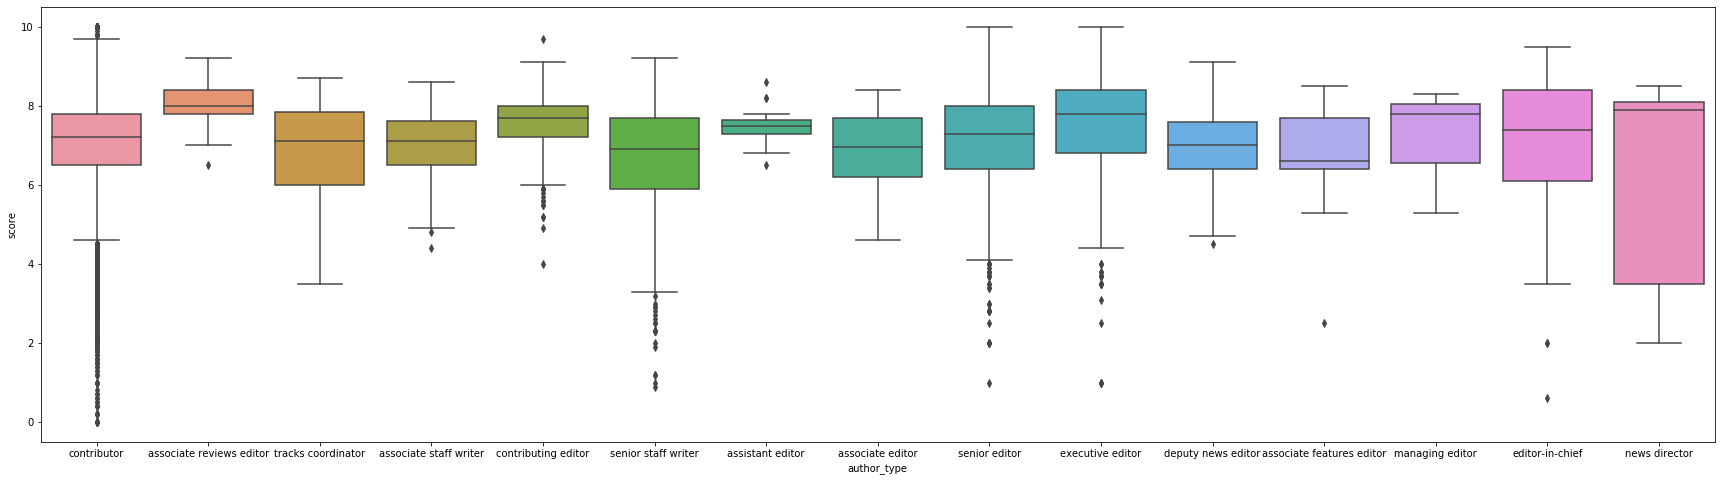

In [33]:
plt.figure(figsize=(30,8))
sns.boxplot(x='author_type',data=df,y='score')

In [34]:
df['author_type']=df['author_type'].fillna(df['author_type'].mode()[0])

In [35]:
df.isnull().sum()

artist               0
score                0
best_new_music       0
author               0
author_type          0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
genre             2553
label               40
dtype: int64

## Date
### pub_weekday,pub_day,pub_month,pub_year

In [36]:
df['pub_year'].value_counts()

2007    1714
2011    1712
2006    1701
2010    1686
2008    1680
2005    1627
2009    1585
2012    1575
2016    1556
2013    1546
2004    1526
2014    1505
2003    1449
2015    1313
2002    1251
2001     621
2000     497
1999     344
2017      20
Name: pub_year, dtype: int64

In [37]:
df[df['best_new_music']==1].groupby(by='pub_year').mean()['score']

pub_year
2003    8.680769
2004    8.701724
2005    8.698305
2006    8.668750
2007    8.658571
2008    8.596667
2009    8.698425
2010    8.741406
2011    8.686923
2012    8.719328
2013    8.644444
2014    8.716102
2015    8.666990
2016    8.570492
2017    8.866667
Name: score, dtype: float64

In [38]:
df.groupby(by=['pub_year','pub_month']).mean().T

pub_year          1999                                                     \
pub_month           1          2          3          4      5          6    
score            7.125   7.929167   7.423077   6.276744   6.36   7.044444   
best_new_music   0.000   0.000000   0.000000   0.000000   0.00   0.000000   
pub_weekday      1.000   1.416667   0.897436   0.906977   1.20   1.044444   
pub_day         16.375  18.166667  19.487179  17.790698  14.35  13.800000   

pub_year                                                    ...       2016  \
pub_month              7          8          9          10  ...         4    
score            6.591176   6.861111   5.912500   6.911765  ...   7.578231   
best_new_music   0.000000   0.000000   0.000000   0.000000  ...   0.095238   
pub_weekday      1.117647   1.611111   1.312500   0.970588  ...   2.414966   
pub_day         13.941176  15.666667  18.979167  15.676471  ...  16.605442   

pub_year                                                               \
pub_month              5          6          7          8          9    
score            7.381102   7.042857   7.278626   7.097761   7.463910   
best_new_music   0.070866   0.078571   0.083969   0.014925   0.135338   
pub_weekday      2.338583   2.535714   2.885496   2.358209   2.729323   
pub_day         15.362205  15.835714  16.503817  15.843284  15.413534   

pub_year                                         2017  
pub_month              10         11         12    1   
score            7.196947   7.300000   7.121505  7.25  
best_new_music   0.091603   0.061538   0.096774  0.15  
pub_weekday      2.549618   2.215385   2.838710  2.50  
pub_day         16.610687  14.330769  12.881720  4.50  

[4 rows x 217 columns]

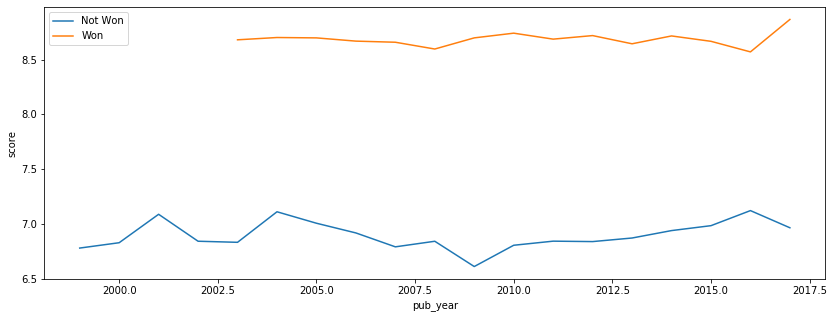

In [39]:
plt.figure(figsize=(14,5))
sns.lineplot(y=df[df['best_new_music']==0].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==0].groupby(by='pub_year').mean().index)
sns.lineplot(y=df[df['best_new_music']==1].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==1].groupby(by='pub_year').mean().index)
plt.legend(labels=['Not Won','Won'])
plt.show()

## Inference
    1.Best New Music awards started from 2003
    2. Removing values from 2017 since it seems that data has been taken from early 2017

In [40]:
df=df[df['pub_year']!=2017]

### pub_month

In [41]:
df['pub_month'].value_counts()

10    2388
3     2330
4     2309
6     2246
5     2200
9     2175
11    2059
2     2042
7     2025
1     2010
8     2009
12    1095
Name: pub_month, dtype: int64

### pub_day

In [42]:
df['pub_day'].value_counts()

8     916
7     915
12    883
11    879
9     868
10    864
14    857
13    854
6     848
5     824
20    822
21    814
2     813
23    812
16    810
4     808
18    799
15    797
19    795
3     787
22    778
17    777
26    775
25    772
30    769
1     763
28    757
27    755
24    743
29    711
31    523
Name: pub_day, dtype: int64

## Genre

## Labels

## Base Model

In [43]:
## Shape before Dropping
df.shape

(24888, 11)

In [44]:
df=df.dropna()

In [45]:
## Shape after dropping
df.shape

(22298, 11)

In [46]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols

['artist', 'author', 'author_type', 'genre', 'label']

In [47]:
cols=['author_type','genre']
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [48]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['artist']=le.fit_transform(df['artist'])
df['author']=le.fit_transform(df['author'])
df['label']=le.fit_transform(df['label'])
df['pub_year']=le.fit_transform(df['pub_year'])

In [49]:
df=df.drop(['pub_day'],axis=1)

In [50]:
df.head()

,artist,score,best_new_music,author,pub_weekday,pub_month,pub_year,label,author_type_associate editor,author_type_associate features editor,...,author_type_senior staff writer,author_type_tracks coordinator,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock
20,1076,8.1,0,383,4,12,17,2483,0,0,...,0,0,0,0,0,0,0,1,0,0
21,1076,8.1,0,383,4,12,17,2483,0,0,...,0,0,0,0,0,0,0,0,1,0
22,2931,7.2,0,42,4,12,17,1610,0,0,...,0,0,1,0,0,0,0,0,0,0
23,6589,7.0,0,340,3,12,17,2283,0,0,...,0,0,0,0,0,0,0,1,0,0
24,6589,7.0,0,340,3,12,17,2283,0,0,...,0,0,0,0,0,0,0,0,1,0


## Generating X and Y

In [51]:
y=df['score']
X=df.drop('score',axis=1)

In [52]:
import statsmodels.api as sm
xc=sm.add_constant(X)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     102.9
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:56:56   Log-Likelihood:                -36538.
No. Observations:               22298   AIC:                         7.314e+04
Df Residuals:                   22268   BIC:                         7.338e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     7.1702      0.291     24.644      0.000       6.600       7.740
artist                                -2.748e-06   3.94e-06     -0.697      0.486   -1.05e-05    4.98e-06
best_new_music                            1.7748      0.036     48.687      0.000       1.703       1.846
author                                -5.837e-05    7.2e-05     -0.810      0.418      -0.000    8.28e-05
pub_weekday                               0.0080      0.005      1.573      0.116      -0.002       0.018
pub_month                                 0.0098      0.003      3.870      0.000       0.005       0.015
pub_year                                  0.0027      0.002      1.409      0.159      -0.001       0.007
label                                   2.12e-05   8.93e-06      2.375      0.018    3.71e-06    3.87e-05
author_type_associate editor             -0.5515      0.336     -1.643      0.100      -1.209       0.106
author_type_associate features editor    -0.9349      0.431     -2.171      0.030      -1.779      -0.091
author_type_associate reviews editor      0.0338      0.339      0.100      0.921      -0.631       0.699
author_type_associate staff writer       -0.4662      0.310     -1.505      0.132      -1.073       0.141
author_type_contributing editor           0.0532      0.298      0.178      0.858      -0.532       0.638
author_type_contributor                  -0.4971      0.287     -1.733      0.083      -1.059       0.065
author_type_deputy news editor           -0.4984      0.313     -1.594      0.111      -1.111       0.114
author_type_editor-in-chief              -0.3639      0.309     -1.179      0.238      -0.969       0.241
author_type_executive editor             -0.2198      0.291     -0.755      0.450      -0.791       0.351
author_type_managing editor              -0.7831      0.775     -1.011      0.312      -2.301       0.735
author_type_news director                -1.2000      0.687     -1.748      0.080      -2.546       0.146
author_type_senior editor                -0.5710      0.291     -1.963      0.050      -1.141      -0.001
author_type_senior staff writer          -0.8759      0.291     -3.009      0.003      -1.447      -0.305
author_type_tracks coordinator           -0.7377      0.336     -2.193      0.028      -1.397      -0.078
genre_experimental                        0.3914      0.034     11.399      0.000       0.324       0.459
genre_folk/country                        0.3499      0.050      6.978      0.000       0.252       0.448
genre_global                              0.4947      0.082      6.034      0.000       0.334       0.655
genre_jazz                                0.4051      0.061      6.688      0.000       0.286       0.524
genre_met

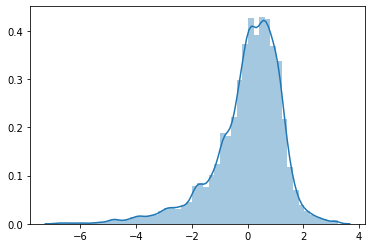

In [53]:
residuals=model.resid
sns.distplot(residuals)

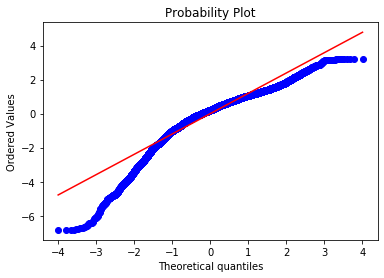

In [54]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

In [55]:
# Backward Elimination
cols=list(X.columns)
pmax=1
while len(cols)>0:
    p=[]
    C=X[cols]
    xc=sm.add_constant(C)
    model=sm.OLS(y,xc).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if pmax>0.05:
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_cols=cols
print(selected_cols)

['best_new_music', 'pub_month', 'label', 'author_type_associate editor', 'author_type_associate features editor', 'author_type_associate staff writer', 'author_type_contributor', 'author_type_deputy news editor', 'author_type_editor-in-chief', 'author_type_executive editor', 'author_type_senior editor', 'author_type_senior staff writer', 'author_type_tracks coordinator', 'genre_experimental', 'genre_folk/country', 'genre_global', 'genre_jazz', 'genre_metal', 'genre_rock']


In [56]:
X_final=df[cols]
y=df['score']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error as mse
Xtrain,Xtest,ytrain,ytest=train_test_split(X_final,y,test_size=0.3,random_state=0)

In [58]:
LR=LinearRegression()
LR.fit(Xtrain,ytrain)
y_pred_train=LR.predict(Xtrain)
print('R2 score of Train:',r2_score(ytrain,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(ytrain,y_pred_train)))

R2 score of Train: 0.122031137622582
RMSE of Train: 1.2392988776369251


In [59]:
y_pred_test=LR.predict(Xtest)
print('R2 score of Test:',r2_score(ytest,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(ytest,y_pred_test)))

R2 score of Test: 0.10712197845999638
RMSE of Test: 1.262034144117436


## K-Fold

In [60]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR],['MVLR']):
    rmse=[]

    for train, test in kf.split(X_final,y):
        X_train,X_test=X_final.iloc[train,:],X_final.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        rmse.append(np.sqrt(mse(y_test,y_pred)))
print(rmse)

[1.2700337966777249, 1.2383431559340254, 1.2441747873975408, 1.2419358933813225, 1.239704018650326]


In [61]:
np.mean(rmse),np.var(rmse,ddof=1)


(1.246838330408188, 0.00017305609980950045)